# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [108]:
df = pd.read_csv('../data/states_edu.csv')
df.head()
df.shape

(1715, 25)

You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [109]:
df.rename({
    'GRADES_PK_G': 'PK_ENR',
    'GRADES_KG_G': 'K_ENR',
    'GRADES_4_G': '4_ENR',
    'GRADES_8_G': '8_ENR',
    'GRADES_12_G': '12_ENR',
    'GRADES_1_8_G': '1_8_ENR',
    'GRADES_9_12_G': '9_12_ENR',
    'GRADES_ALL_G': 'ALL_ENR',
    'ENROLL': 'ALL_USCENSUS'
    },
    axis=1, inplace=True)


df.dropna(subset=['AVG_MATH_8_SCORE'], inplace=True)
df.isna().sum()
df.shape

(602, 25)

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen one of Grade 4 Reading, Grade 4 Math, or Grade 8 Math to focus on: *Grade 8 Math*

How many years of data are logged in our dataset? 

In [110]:
df["YEAR"].max() - df["YEAR"].min() 

29

Let's compare Michigan to Ohio. Which state has the higher average across all years in the test you chose?

In [111]:
mich = df[df["STATE"] == 'MICHIGAN']
ohio = df[df["STATE"] == 'OHIO']
mich['AVG_MATH_8_SCORE'].mean()
print(mich['AVG_MATH_8_SCORE'].mean(),"\n",ohio['AVG_MATH_8_SCORE'].mean(),"\nOhio has higher average")

276.1666666666667 
 282.25 
Ohio has higher average


Find the average for your chosen test across all states in 2019

In [112]:
results2019 = df[df["YEAR"] == 2019]
print(results2019['AVG_MATH_8_SCORE'].mean())

281.2641509433962


For each state, find a maximum value for your chosen test score

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [113]:
states = df.groupby("STATE")
states['AVG_MATH_8_SCORE'].describe()

,count,mean,std,min,25%,50%,75%,max
STATE,,,,,,,,
ALABAMA,12.0,264.166667,6.042777,252.0,262.00,266.5,269.00,269.0
ALASKA,9.0,280.000000,3.122499,274.0,279.00,280.0,283.00,283.0
ARIZONA,12.0,274.666667,7.139306,260.0,270.50,276.5,280.00,283.0
ARKANSAS,12.0,269.750000,8.708669,256.0,263.75,274.0,275.25,279.0
CALIFORNIA,12.0,269.166667,6.965282,256.0,265.50,270.0,275.25,277.0
COLORADO,11.0,283.181818,7.467505,267.0,282.00,286.0,286.50,292.0
CONNECTICUT,12.0,282.250000,5.395705,270.0,281.00,284.0,285.25,289.0
DELAWARE,11.0,277.181818,7.897065,261.0,277.00,280.0,282.50,284.0
DISTRICT_OF_COLUMBIA,12.0,251.166667,13.482874,231.0,241.00,251.0,263.50,269.0


<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [114]:
# let's create a new column which represents expenditure per student
df['SUPPORT_SERVICES_EXPENDITURE_PER_STUDENT'] = df['SUPPORT_SERVICES_EXPENDITURE'] / df['ALL_USCENSUS']
df['TEACHING_EXPENDITURE_RATIO'] = df['INSTRUCTION_EXPENDITURE'] / df['TOTAL_EXPENDITURE']

Feature engineering justification: **I divided teaching expenditure by total expenditure to show a ratio of eduation funding in comparison to total expenditure**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

<Axes: title={'center': 'Distribution of 8th Grade Math Scores'}, ylabel='Frequency'>

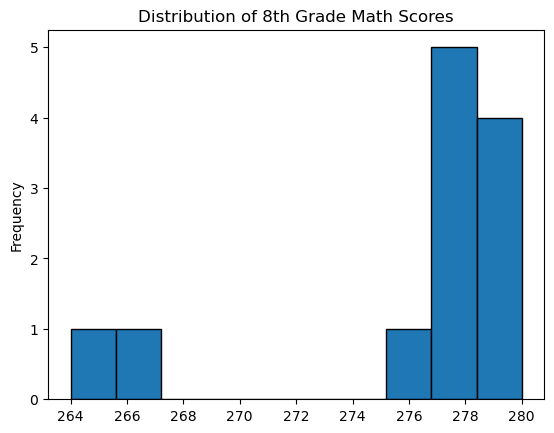

In [95]:
df[df['STATE'] == "MICHIGAN"].AVG_MATH_8_SCORE.plot.hist(title="Distribution of 8th Grade Math Scores", edgecolor="black")

**Michigan distribution is not normal. I think this is heavily influenced by the limited sample size of only 12 records** In this case I would say, that we will need to make the sample bigger to derive conclusions.

**Visualization 2**

Text(0, 0.5, '8th Grade Math Score')

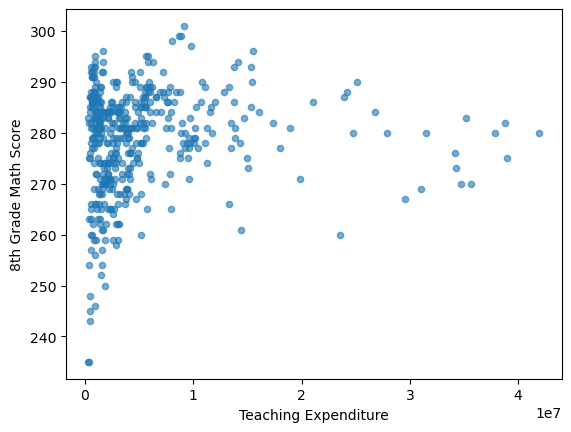

In [115]:
df.plot.scatter(x='INSTRUCTION_EXPENDITURE', y='AVG_MATH_8_SCORE', alpha=0.6)
plt.xlabel('Teaching Expenditure')
plt.ylabel('8th Grade Math Score')

**We can't say there's a correlation between 8th Grade Math score and teaching expenditure** This came as a surprise to me, it's a bit more correlated than completely random, but not by a much

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [116]:
from sklearn.model_selection import train_test_split

In [117]:
X = df[['ALL_USCENSUS','AVG_READING_8_SCORE','AVG_READING_4_SCORE']].dropna()
y = df.loc[X.index]['AVG_MATH_8_SCORE']

In [118]:
 X_train, X_test, y_train, y_test = train_test_split(
      X, y, test_size=0.3, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [119]:
from sklearn.linear_model import LinearRegression

In [120]:
model = LinearRegression()

In [121]:
model.fit(X_train, y_train)

LinearRegression()

In [122]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [123]:
print(1 - ( 1-model.score(X, y) ) * ( len(y) - 1 ) / ( len(y) - X.shape[1] - 1 ))
print(model.score(X_test, y_test))
#Adjusted R-Squared

0.8133319909965535
0.8033611464801256


We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

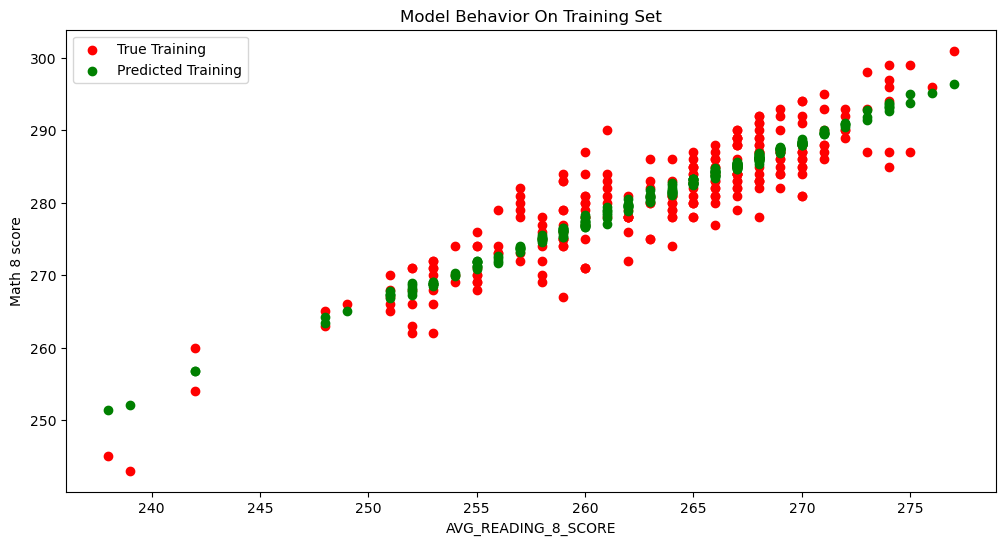

In [124]:
col_name = 'AVG_READING_8_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('Math 8 score')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

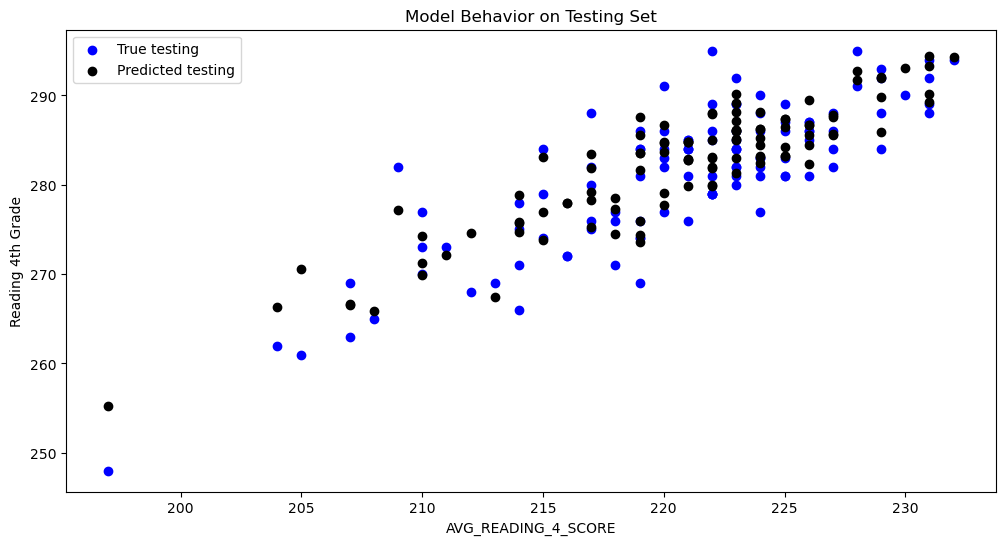

In [125]:
col_name = 'AVG_READING_4_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('Reading 4th Grade')
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

**<WRITE A PARAGRAPH SUMMARIZING YOUR WORK, FINDINGS, AND THE PERFORMANCE OF YOUR MODEL\>**

Firstly, I cleaned and prepared the data. After we explored the data and found, that there's no correlation of state education expenditure with how well the students score in Grade 8th Math tests. Moreover we created a feature, that helps us to describe each state commitment to education by creating a ratio of teaching_expenditure / total_expenditure. Lastly we build a ML model, which was very succesfull given that the Adjusted R and R were 0.8133319909965535
0.8033611464801256 respectively. The model success is also visible from scatter plots.